In [32]:
import requests
from bs4 import BeautifulSoup
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Reading document-term matrix

In [3]:
data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()


,ali,anthony,bill,bo,dave,hasan,jim,joe,john,louis,mike,ricky
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0,0,0,0


### top 50 words said by each comedian

In [5]:
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(50)
    top_dict[c]= list(zip(top.index, top.values))

top_dict


{'ali': [('like', 126),
  ('im', 74),
  ('know', 65),
  ('just', 64),
  ('dont', 61),
  ('thats', 34),
  ('shit', 34),
  ('youre', 31),
  ('gonna', 28),
  ('ok', 26),
  ('lot', 24),
  ('wanna', 21),
  ('oh', 21),
  ('gotta', 21),
  ('husband', 20),
  ('time', 19),
  ('right', 19),
  ('got', 19),
  ('cause', 18),
  ('day', 17),
  ('women', 17),
  ('people', 16),
  ('pregnant', 15),
  ('hes', 14),
  ('god', 14),
  ('need', 14),
  ('tell', 13),
  ('yeah', 13),
  ('work', 12),
  ('theyre', 12),
  ('dude', 12),
  ('really', 12),
  ('fuck', 11),
  ('uh', 11),
  ('asian', 11),
  ('look', 11),
  ('white', 11),
  ('anymore', 10),
  ('doo', 10),
  ('want', 10),
  ('scared', 10),
  ('fingers', 10),
  ('think', 10),
  ('make', 10),
  ('feel', 10),
  ('mom', 9),
  ('baby', 9),
  ('toilet', 9),
  ('little', 9),
  ('yes', 9)],
 'anthony': [('im', 60),
  ('like', 50),
  ('know', 39),
  ('dont', 38),
  ('got', 34),
  ('joke', 34),
  ('thats', 31),
  ('said', 31),
  ('anthony', 27),
  ('just', 26),
  ('

### top 10 words said by each comedian

In [10]:
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:10]]))
    print('---')

ali
like, im, know, just, dont, thats, shit, youre, gonna, ok
---
anthony
im, like, know, dont, got, joke, thats, said, anthony, just
---
bill
like, just, right, im, know, dont, gonna, got, fucking, yeah
---
bo
know, like, think, im, love, bo, just, stuff, repeat, dont
---
dave
like, know, said, just, im, shit, people, didnt, dont, ahah
---
hasan
like, im, know, dont, dad, youre, just, going, thats, want
---
jim
like, im, dont, right, fucking, went, know, just, youre, people
---
joe
like, people, just, dont, fucking, im, fuck, thats, gonna, theyre
---
john
like, know, just, dont, said, clinton, im, thats, right, youre
---
louis
like, just, know, dont, thats, im, youre, life, people, thing
---
mike
like, im, know, said, just, dont, think, thats, says, cause
---
ricky
right, like, just, im, dont, know, said, yeah, fucking, got
---


### Top 50 words for each comedian

In [11]:
from collections import Counter

# Let's first pull out the top 50 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words


['like',
 'im',
 'know',
 'just',
 'dont',
 'thats',
 'shit',
 'youre',
 'gonna',
 'ok',
 'lot',
 'wanna',
 'oh',
 'gotta',
 'husband',
 'time',
 'right',
 'got',
 'cause',
 'day',
 'women',
 'people',
 'pregnant',
 'hes',
 'god',
 'need',
 'tell',
 'yeah',
 'work',
 'theyre',
 'dude',
 'really',
 'fuck',
 'uh',
 'asian',
 'look',
 'white',
 'anymore',
 'doo',
 'want',
 'scared',
 'fingers',
 'think',
 'make',
 'feel',
 'mom',
 'baby',
 'toilet',
 'little',
 'yes',
 'im',
 'like',
 'know',
 'dont',
 'got',
 'joke',
 'thats',
 'said',
 'anthony',
 'just',
 'day',
 'say',
 'guys',
 'people',
 'tell',
 'youre',
 'grandma',
 'right',
 'thing',
 'think',
 'time',
 'yeah',
 'school',
 'good',
 'jokes',
 'did',
 'gonna',
 'baby',
 'okay',
 'ive',
 'shark',
 'mad',
 'didnt',
 'family',
 'hate',
 'lot',
 'dad',
 'things',
 'new',
 'come',
 'money',
 'mom',
 'little',
 'san',
 'gotta',
 'getting',
 'kid',
 'zealand',
 'wrong',
 'fun',
 'like',
 'just',
 'right',
 'im',
 'know',
 'dont',
 'gonna'

In [12]:
#length of the words
len(words)

600

In [13]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()


[('like', 12),
 ('im', 12),
 ('know', 12),
 ('just', 12),
 ('dont', 12),
 ('thats', 12),
 ('youre', 12),
 ('right', 12),
 ('people', 12),
 ('think', 11),
 ('time', 10),
 ('got', 10),
 ('say', 10),
 ('gonna', 9),
 ('oh', 9),
 ('hes', 9),
 ('yeah', 8),
 ('theyre', 8),
 ('fuck', 8),
 ('little', 8),
 ('said', 8),
 ('good', 8),
 ('didnt', 8),
 ('shit', 7),
 ('cause', 7),
 ('day', 7),
 ('really', 7),
 ('want', 7),
 ('thing', 7),
 ('did', 7),
 ('going', 7),
 ('come', 6),
 ('fucking', 6),
 ('theres', 6),
 ('man', 6),
 ('way', 6),
 ('look', 5),
 ('guy', 5),
 ('old', 5),
 ('mean', 5),
 ('lot', 4),
 ('women', 4),
 ('tell', 4),
 ('make', 4),
 ('mom', 4),
 ('guys', 4),
 ('okay', 4),
 ('ive', 4),
 ('kid', 4),
 ('life', 4),
 ('ill', 4),
 ('love', 4),
 ('night', 4),
 ('shes', 4),
 ('ok', 3),
 ('gotta', 3),
 ('god', 3),
 ('dude', 3),
 ('uh', 3),
 ('white', 3),
 ('baby', 3),
 ('dad', 3),
 ('things', 3),
 ('hey', 3),
 ('whats', 3),
 ('real', 3),
 ('house', 3),
 ('went', 3),
 ('goes', 3),
 ('kids', 3),
 (

In [14]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words


['like',
 'im',
 'know',
 'just',
 'dont',
 'thats',
 'youre',
 'right',
 'people',
 'think',
 'time',
 'got',
 'say',
 'gonna',
 'oh',
 'hes',
 'yeah',
 'theyre',
 'fuck',
 'little',
 'said',
 'good',
 'didnt',
 'shit',
 'cause',
 'day',
 'really',
 'want',
 'thing',
 'did',
 'going']

### Update Document term matrix

In [18]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)
stop_words


frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [24]:
# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index
data_stop


,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,aah,abc,abcs,ability,abject,...,zee,zen,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
ali,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,1,1,1,0,0
bo,0,1,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
dave,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,0,...,2,1,0,1,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
louis,0,0,0,0,0,3,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0


In [25]:
# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")


### word clouds

In [30]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

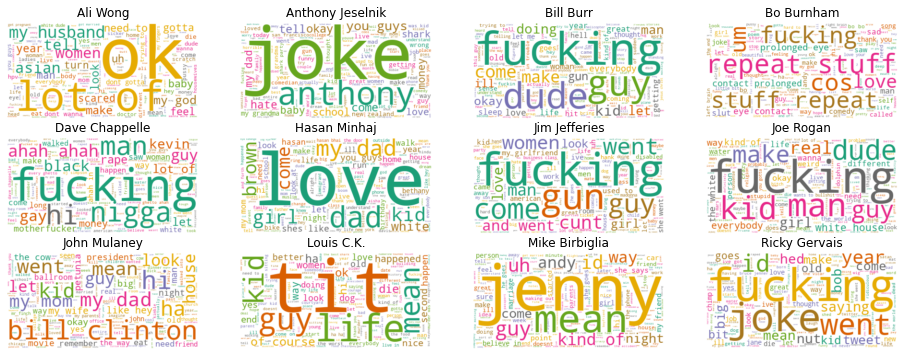

In [33]:
# Reset the output dimensions
plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']


# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()


### Number of Words

In [46]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)
    
unique_list 
    

[1341, 983, 1633, 1272, 1404, 1559, 1313, 1435, 1399, 1098, 1494, 1633]

In [51]:
# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(zip(full_names, unique_list), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort


,comedian,unique_words
1,Anthony Jeselnik,983
9,Louis C.K.,1098
3,Bo Burnham,1272
6,Jim Jefferies,1313
0,Ali Wong,1341
8,John Mulaney,1399
4,Dave Chappelle,1404
7,Joe Rogan,1435
10,Mike Birbiglia,1494
5,Hasan Minhaj,1559


### Calculate the words per minute of each comedian

In [56]:
# Find the total number of words that a comedian uses
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)
    
# Comedy special run times from IMDB, in minutes
run_times = [60, 59, 80, 60, 67, 73, 77, 63, 62, 58, 76, 79]  

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']
    
data_words 
    

,comedian,unique_words,total_words,run_times,words_per_minute
0,Ali Wong,1341,3283,60,54.716667
1,Anthony Jeselnik,983,2905,59,49.237288
2,Bill Burr,1633,5535,80,69.187500
3,Bo Burnham,1272,3165,60,52.750000
4,Dave Chappelle,1404,4094,67,61.104478
5,Hasan Minhaj,1559,4777,73,65.438356
6,Jim Jefferies,1313,4764,77,61.870130
7,Joe Rogan,1435,4579,63,72.682540
8,John Mulaney,1399,4019,62,64.822581
9,Louis C.K.,1098,3332,58,57.448276


In [57]:
# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,comedian,unique_words,total_words,run_times,words_per_minute
1,Anthony Jeselnik,983,2905,59,49.237288
3,Bo Burnham,1272,3165,60,52.750000
0,Ali Wong,1341,3283,60,54.716667
9,Louis C.K.,1098,3332,58,57.448276
4,Dave Chappelle,1404,4094,67,61.104478
6,Jim Jefferies,1313,4764,77,61.870130
10,Mike Birbiglia,1494,4741,76,62.381579
11,Ricky Gervais,1633,4972,79,62.936709
8,John Mulaney,1399,4019,62,64.822581
5,Hasan Minhaj,1559,4777,73,65.438356


### Plot

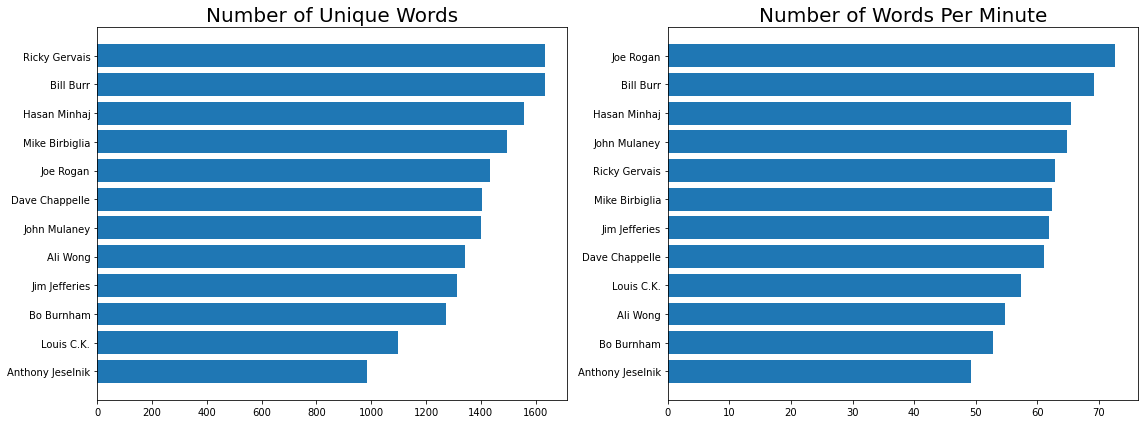

In [60]:
y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()



Findings

    Vocabulary
        Ricky Gervais (British comedy) and Bill Burr (podcast host) use a lot of words in their comedy
        Louis C.K. (self-depricating comedy) and Anthony Jeselnik (dark humor) have a smaller vocabulary

    Talking Speed
        Joe Rogan (blue comedy) and Bill Burr (podcast host) talk fast
        Bo Burnham (musical comedy) and Anthony Jeselnik (dark humor) talk slow

Ali Wong is somewhere in the middle in both cases. Nothing too interesting here.


### Amount of Profanity

In [61]:
# Earlier I said we'd revisit profanity. Let's take a look at the most common words again.
Counter(words).most_common()

[('like', 12),
 ('im', 12),
 ('know', 12),
 ('just', 12),
 ('dont', 12),
 ('thats', 12),
 ('youre', 12),
 ('right', 12),
 ('people', 12),
 ('think', 11),
 ('time', 10),
 ('got', 10),
 ('say', 10),
 ('gonna', 9),
 ('oh', 9),
 ('hes', 9),
 ('yeah', 8),
 ('theyre', 8),
 ('fuck', 8),
 ('little', 8),
 ('said', 8),
 ('good', 8),
 ('didnt', 8),
 ('shit', 7),
 ('cause', 7),
 ('day', 7),
 ('really', 7),
 ('want', 7),
 ('thing', 7),
 ('did', 7),
 ('going', 7),
 ('come', 6),
 ('fucking', 6),
 ('theres', 6),
 ('man', 6),
 ('way', 6),
 ('look', 5),
 ('guy', 5),
 ('old', 5),
 ('mean', 5),
 ('lot', 4),
 ('women', 4),
 ('tell', 4),
 ('make', 4),
 ('mom', 4),
 ('guys', 4),
 ('okay', 4),
 ('ive', 4),
 ('kid', 4),
 ('life', 4),
 ('ill', 4),
 ('love', 4),
 ('night', 4),
 ('shes', 4),
 ('ok', 3),
 ('gotta', 3),
 ('god', 3),
 ('dude', 3),
 ('uh', 3),
 ('white', 3),
 ('baby', 3),
 ('dad', 3),
 ('things', 3),
 ('hey', 3),
 ('whats', 3),
 ('real', 3),
 ('house', 3),
 ('went', 3),
 ('goes', 3),
 ('kids', 3),
 (

### Isolating bad words

In [63]:
# Let's isolate just these bad words
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit']]
data_bad_words

,fucking,fuck,shit
ali,5,11,34
anthony,6,9,9
bill,70,36,63
bo,22,15,6
dave,32,33,45
hasan,8,16,15
jim,78,37,20
joe,69,66,40
john,2,2,6
louis,6,15,25


In [65]:
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity


,f_word,s_word
ali,16,34
anthony,15,9
bill,106,63
bo,37,6
dave,65,45
hasan,24,15
jim,115,20
joe,135,40
john,4,6
louis,21,25


### Visualization of Bad Words

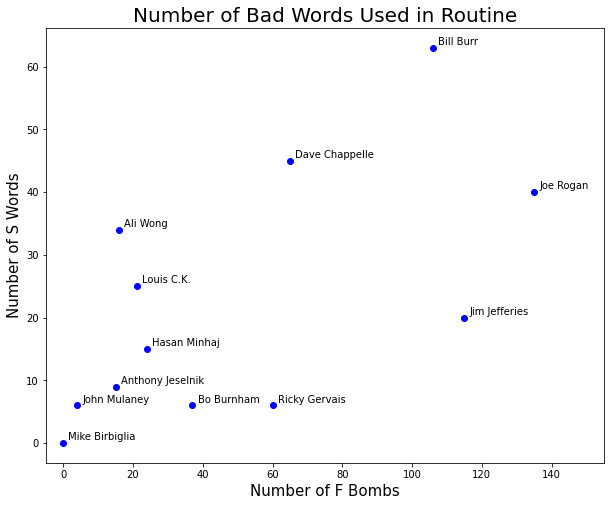

In [66]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()